In [1]:
import numpy as np
import pandas as pd
import os

from skimage.transform import resize   # Image Processing Library
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc    # Garbage Collector
gc.collect()

import json

from PIL import Image

In [2]:
# Input data files are available in the "../../../fiftyone/coco-2014" directory.
print(os.listdir("../../fiftyone/coco-2014"))

['info.json', 'raw', 'test', 'train', 'validation']


In [3]:
with open("../../fiftyone/coco-2014/info.json", 'r') as file:
    info = json.load(file)

In [4]:
info

{'name': 'coco-2014',
 'zoo_dataset': 'fiftyone.zoo.datasets.base.COCO2014Dataset',
 'dataset_type': 'fiftyone.types.dataset_types.COCODetectionDataset',
 'num_samples': 164062,
 'downloaded_splits': {'validation': {'split': 'validation',
   'num_samples': 40504},
  'train': {'split': 'train', 'num_samples': 82783},
  'test': {'split': 'test', 'num_samples': 40775}},
 'classes': ['0',
  'person',
  'bicycle',
  'car',
  'motorcycle',
  'airplane',
  'bus',
  'train',
  'truck',
  'boat',
  'traffic light',
  'fire hydrant',
  '12',
  'stop sign',
  'parking meter',
  'bench',
  'bird',
  'cat',
  'dog',
  'horse',
  'sheep',
  'cow',
  'elephant',
  'bear',
  'zebra',
  'giraffe',
  '26',
  'backpack',
  'umbrella',
  '29',
  '30',
  'handbag',
  'tie',
  'suitcase',
  'frisbee',
  'skis',
  'snowboard',
  'sports ball',
  'kite',
  'baseball bat',
  'baseball glove',
  'skateboard',
  'surfboard',
  'tennis racket',
  'bottle',
  '45',
  'wine glass',
  'cup',
  'fork',
  'knife',
  '

In [5]:
with open("../../fiftyone/coco-2014/raw/captions_train2014.json", 'r') as file:
    caption = json.load(file)

In [6]:
caption.keys()

dict_keys(['info', 'images', 'licenses', 'annotations'])

In [7]:
caption['info']

{'description': 'COCO 2014 Dataset',
 'url': 'http://cocodataset.org',
 'version': '1.0',
 'year': 2014,
 'contributor': 'COCO Consortium',
 'date_created': '2017/09/01'}

In [8]:
caption['images'][0]

{'license': 5,
 'file_name': 'COCO_train2014_000000057870.jpg',
 'coco_url': 'http://images.cocodataset.org/train2014/COCO_train2014_000000057870.jpg',
 'height': 480,
 'width': 640,
 'date_captured': '2013-11-14 16:28:13',
 'flickr_url': 'http://farm4.staticflickr.com/3153/2970773875_164f0c0b83_z.jpg',
 'id': 57870}

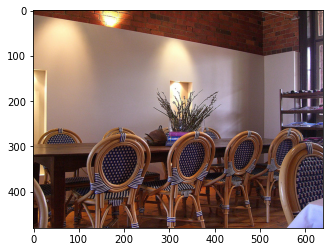

In [9]:
plt.imshow(plt.imread("../../fiftyone/coco-2014/train/data/COCO_train2014_000000057870.jpg"));

In [14]:
caption['annotations'][0]

{'image_id': 318556,
 'id': 48,
 'caption': 'A very clean and well decorated empty bathroom'}

In [15]:
for cap in caption['annotations']:
    if cap["image_id"] == 57870:
        print(cap["caption"])

A restaurant has modern wooden tables and chairs.
A long restaurant table with rattan rounded back chairs.
a long table with a plant on top of it surrounded with wooden chairs 
A long table with a flower arrangement in the middle for meetings
A table is adorned with wooden chairs with blue accents.


In [16]:
with open("../../fiftyone/coco-2014/train/labels.json", 'r') as file:
    labels = json.load(file)

In [19]:
labels.keys()

dict_keys(['info', 'images', 'licenses', 'annotations', 'categories'])

In [25]:
labels["annotations"][2].keys()

dict_keys(['segmentation', 'area', 'iscrowd', 'image_id', 'bbox', 'category_id', 'id'])

In [28]:
labels["categories"]

[{'supercategory': 'person', 'id': 1, 'name': 'person'},
 {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'},
 {'supercategory': 'vehicle', 'id': 3, 'name': 'car'},
 {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'},
 {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'},
 {'supercategory': 'vehicle', 'id': 6, 'name': 'bus'},
 {'supercategory': 'vehicle', 'id': 7, 'name': 'train'},
 {'supercategory': 'vehicle', 'id': 8, 'name': 'truck'},
 {'supercategory': 'vehicle', 'id': 9, 'name': 'boat'},
 {'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'},
 {'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'},
 {'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'},
 {'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'},
 {'supercategory': 'outdoor', 'id': 15, 'name': 'bench'},
 {'supercategory': 'animal', 'id': 16, 'name': 'bird'},
 {'supercategory': 'animal', 'id': 17, 'name': 'cat'},
 {'supercategory': 'animal', 'id': 18, 'name': 'dog'},